In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit

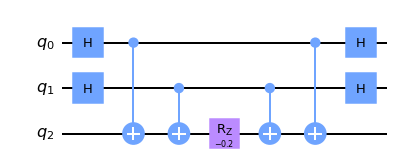

In [2]:
dt = 0.1

# ancilary-qubit circuit for exp(i dt X \otimes X)
# Change from Nielson and Chuang P210
circ1 = QuantumCircuit(3)
circ1.h(0)
circ1.h(1)
circ1.cx(0,2)
circ1.cx(1,2)
circ1.rz(-2*dt,2)
circ1.cx(1,2)
circ1.cx(0,2)
circ1.h(0)
circ1.h(1)
circ1.draw('mpl')

https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZGate.html

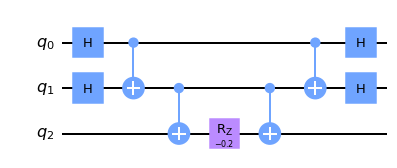

In [3]:
# no ancillary circuit for exp(i dt X \otimes X \otimes Z)

# https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/Hamiltonian_simulation.ipynb
circ2 = QuantumCircuit(3)
circ2.h(0)
circ2.h(1)
circ2.cx(0,1)
circ2.cx(1,2)
circ2.rz(-2*dt,2)
circ2.cx(1,2)
circ2.cx(0,1)
circ2.h(0)
circ2.h(1)
circ2.draw('mpl')

In [4]:
import numpy as np
np.linalg.norm(Operator(circ2) - Operator(circ1)) # So both circuits are the same

0.0

## Test from theory

In [29]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from scipy.linalg import expm # exponential matrix

op = 1j*dt* SparsePauliOp(Pauli('ZXX')).to_matrix() # idt XXZ (qiskit convention is ZXX)
expm(op)

array([[0.99500417-0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.09983342j,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.99500417-0.j        ,
        0.        +0.09983342j, 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        -0.j        , 0.        +0.09983342j,
        0.99500417-0.j        , 0.        -0.j        ,
        0.        -0.j        , 0.        -0.j        ,
        0.        -0.j        , 0.        -0.j        ],
       [0.        +0.09983342j, 0.        -0.j        ,
        0.        -0.j        , 0.99500417-0.j        ,
        0.        -0.j        , 0.        -0.j        ,
        0.        -0.j        , 0.        -0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0

In [30]:
np.linalg.norm(Operator(circ2) - expm(op))

9.6228224407467e-16